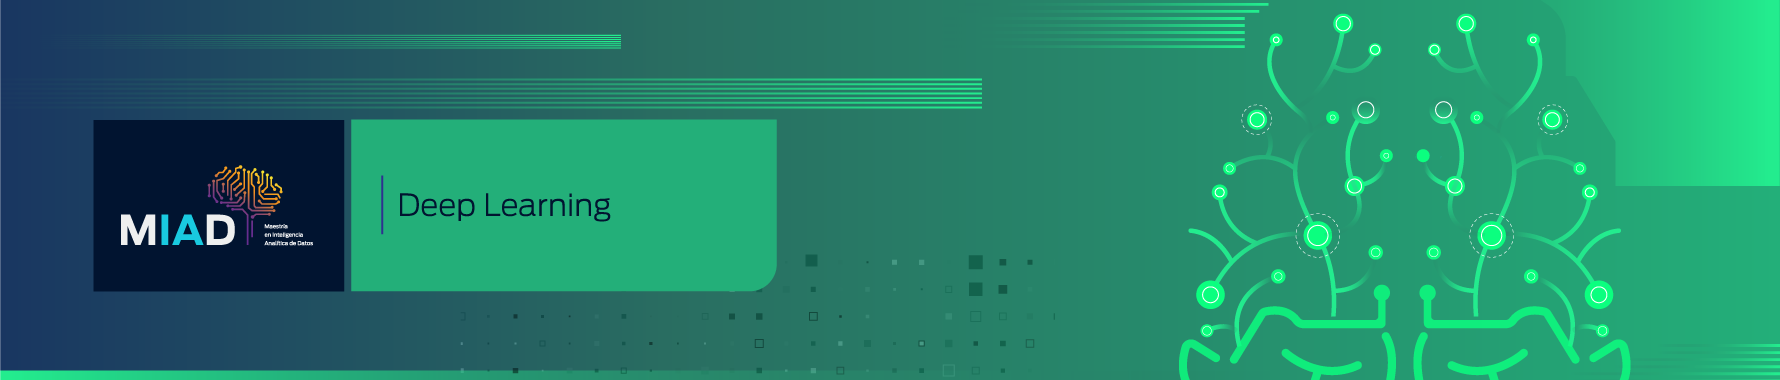

# Redes neuronales usando keras: Comparación de estrategias de regularización


## Actividad calificada por el personal


### Propósito 
En este notebook se pretende evaluar el uso de keras al aplicar una red neuronal en un contexto real haciendo uso de mecanismos de regularización tales como *drop out*, *early stopping*, norma 1 y norma 2 haciendo uso del paquete Keras.

### Instrucciones generales
1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).


### Criterios a evaluar
Los criterios que se evaluarán son:   

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. Realice la partición de la muestra en _train_ y _test_. [5 puntos]

Estimación de un modelo utilizando redes neuronales con *dropout*: Se estima el modelo usando una red neuronal con *dropout* , se evalúa en la muestra de test. [20 puntos]

Estimación de un modelo utilizando redes neuronales con *early stopping*: Se estima el modelo usando una red neuronal con *early stopping*, se evalúa en la muestra de test. [20 puntos]

Estimación de un modelo utilizando redes neuronales con norma 1: Se estima el modelo usando una red neuronal con norma 1, se evalúa en la muestra de test. [20 puntos]

Estimación de un modelo utilizando redes neuronales con norma 2: Se estima el modelo usando una red neuronal con norma 2, se evalúa en la muestra de test. [20 puntos]

Comparación de modelos: Se elige la mejor regularización a partir de una comparación. [15 puntos]

#### Problema
Un manager de un banco manifiesta preocupación porque los clientes están renunciando a las tarjetas de crédito. Este cuenta con los datos disponibles en https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers a cerca de 10000 clientes, si tiene productos activos o no (*"Attrition flag"*), en función de variables tales como edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc.

Ustedes deben proponer el algoritmo para hacer la clasificación de los clientes con una red neuronal.

Finalmente, para resolver los puntos de esta actividad deberán tener en cuenta únicamente las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.

### Librerías a importar

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


### 1. Análisis preliminar de variables [5 puntos]
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

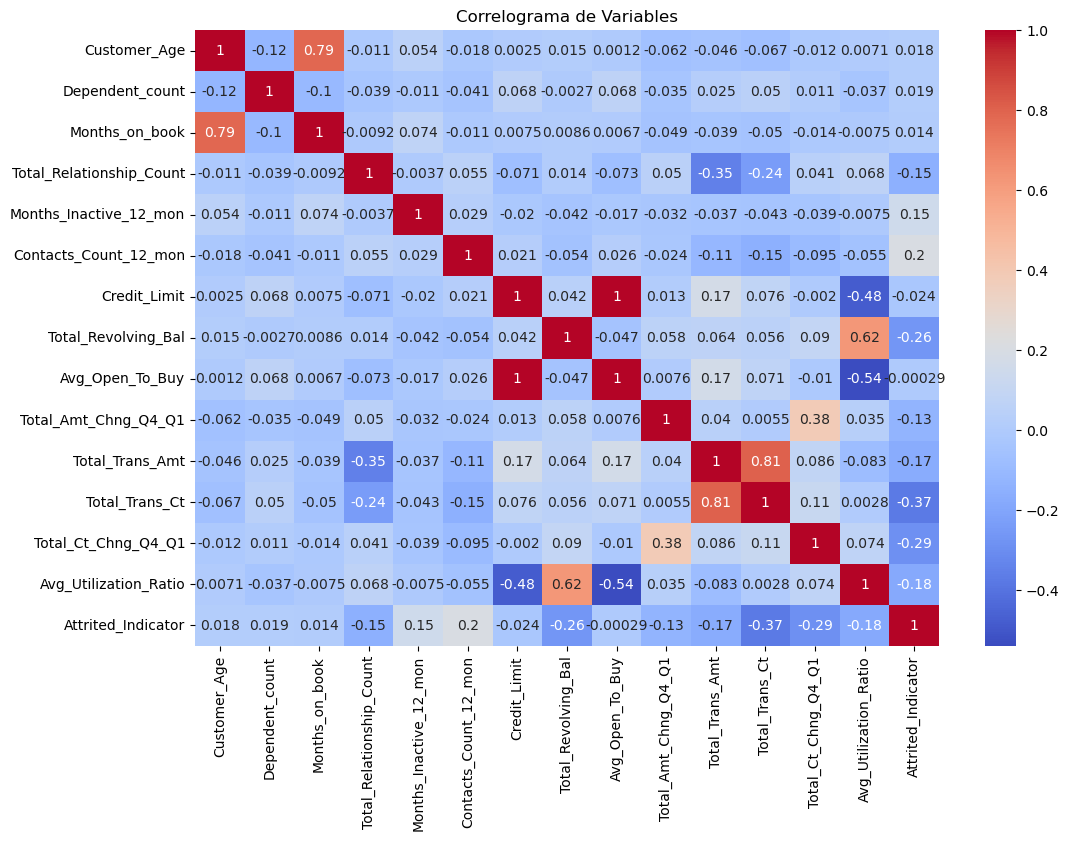

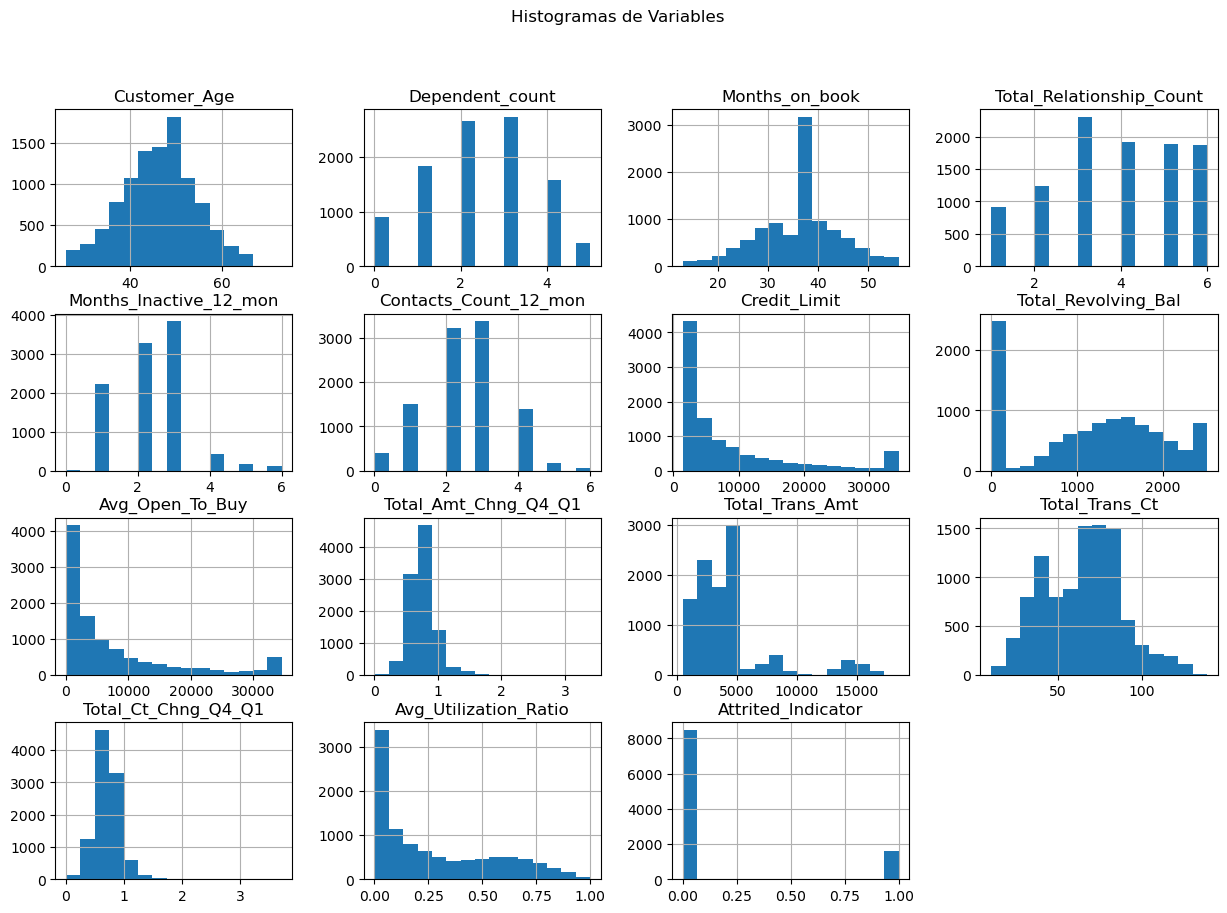

       Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    

In [4]:
# Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
# Cargar los datos
data = pd.read_csv('BankChurners.csv', sep=",")
data = data.iloc[:, :-2]

# Crear variables dependiente
data['Attrited_Indicator'] = (data['Attrition_Flag'] == 'Attrited Customer').astype(int)
data = data.select_dtypes(exclude=['object'])
data = data.dropna()
dataset = data.drop(columns=['CLIENTNUM'])

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de correlación
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlograma de Variables')
plt.show()

# Histogramas de las variables
dataset.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histogramas de Variables')
plt.show()

# Estadísticas descriptivas
descriptive_stats = dataset.describe()
print(descriptive_stats)

In [ ]:
dataset= dataset.to_numpy()  
X_train, X_test, y_train, y_test = train_test_split(dataset[:,0:-1], dataset[:,-1], test_size=0.20)

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)

##### Procedimiento 
Carga de Datos y Limpieza:

- Se cargaron los datos del archivo ‘BankChurners.csv’ utilizando pandas.
- Se eliminaron las últimas dos columnas no necesarias con iloc.
- Se creó una variable dependiente ‘Attrited_Indicator’ para indicar si un cliente se ha dado de baja.
- Se seleccionaron solo las variables continuas y se eliminaron las observaciones con datos faltantes.

Análisis Descriptivo:
Se realizó un análisis descriptivo de las variables, probablemente incluyendo correlogramas, histogramas y estadísticas descriptivas.

##### Análisis de las variables

Edad Promedio: Los clientes tienen una edad promedio de aproximadamente 46 años, con una desviación estándar de 8 años, lo que indica una distribución moderada de edades.

Uso del Crédito: El límite de crédito promedio es de alrededor de 8632 pero el saldo revolvente total promedio es solo de 1163, sugiriendo que los clientes no están utilizando todo su potencial de crédito.

Actividad de la Cuenta: El promedio de meses en libros es de 36 meses, con un promedio de 2.34 meses inactivos en los últimos 12 meses, lo que podría indicar que una porción significativa de cuentas no se usa activamente.

Comportamiento de Transacciones: El monto total promedio de transacciones es de 4404 con un promedio de 65 transacciones, mostrando un historial de transacciones relativamente activo.

Dependientes: En promedio, los clientes tienen 2 dependientes, con un máximo de 5.

Inactividad: Durante los últimos 12 meses, los clientes estuvieron inactivos en promedio 2.34 meses.

Límite de Crédito: El límite de crédito promedio es de 8631.95, con un máximo de 34,516.

Saldo Revolvente: El saldo revolvente promedio es de 1,162.81.

Utilización de Crédito: La tasa promedio de utilización del crédito es del 27.49%.

El promedio del indicador de abandono (Attrited_Indicator) de 0.16 implica que alrededor del 0.16 de los clientes han abandonado, lo cual es una métrica crítica para que el banco considere en sus estrategias de retención. 


### 2. Estimación de un modelo utilizando redes neuronales con *dropout* [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test utilizando una **probabilidad de 0.25**.

Epoch 1/25
811/811 [==============================] - 4s 3ms/step - loss: 123.1165 - accuracy: 0.7345
Epoch 2/25
811/811 [==============================] - 2s 3ms/step - loss: 6.3669 - accuracy: 0.7471
Epoch 3/25
811/811 [==============================] - 2s 3ms/step - loss: 2.0974 - accuracy: 0.7956
Epoch 4/25
811/811 [==============================] - 2s 3ms/step - loss: 1.4135 - accuracy: 0.8067
Epoch 5/25
811/811 [==============================] - 2s 3ms/step - loss: 0.9454 - accuracy: 0.8204
Epoch 6/25
811/811 [==============================] - 2s 3ms/step - loss: 0.6910 - accuracy: 0.8294
Epoch 7/25
811/811 [==============================] - 2s 3ms/step - loss: 0.5742 - accuracy: 0.8330
Epoch 8/25
811/811 [==============================] - 2s 3ms/step - loss: 0.5461 - accuracy: 0.8334
Epoch 9/25
811/811 [==============================] - 2s 2ms/step - loss: 0.4602 - accuracy: 0.8357
Epoch 10/25
811/811 [==============================] - 2s 3ms/step - loss: 0.4629 - accuracy: 0.83

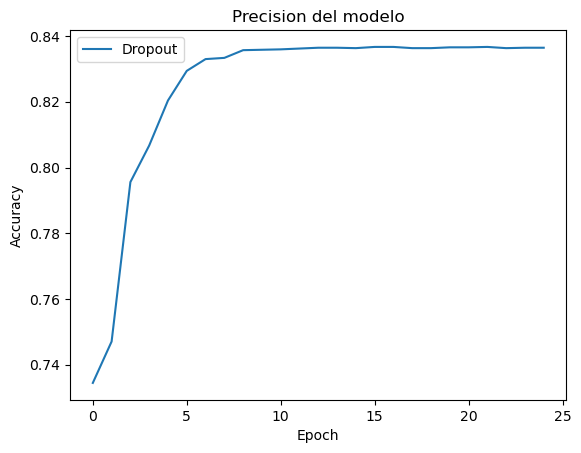

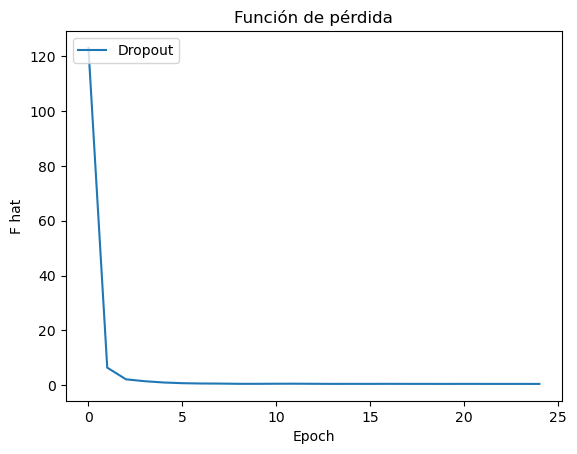

In [8]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####
##Dropout
modeldp = Sequential()
modeldp.add(Dense(30, input_dim=14, activation='relu'))
modeldp.add(Dropout(0.25))
modeldp.add(Dense(20, activation='relu'))
modeldp.add(Dropout(0.25))
modeldp.add(Dense(1, activation='sigmoid'))

##Compilación de los modelos
modeldp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Se entrenan los modelos con los datos de entrenamiento
historydp=modeldp.fit(X_train, y_train, epochs=25, batch_size=10 )

#Se calcula el accuracy de los modelos con las bases de datos de train
_, accuracy = modeldp.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

#Se hacen predicciones utilizando los modelos
prediccionesdp = modeldp.predict(X_test)
redondeadodp = [round(x[0]) for x in prediccionesdp]
prediccionesdp = (modeldp.predict(X_test) > 0.5).astype(int)

#Accuracy en el set de test
test_lossdp, test_accdp = modeldp.evaluate(X_test, y_test)

# Graficar accuracy del modelo
plt.figure(1)
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(historydp.history['accuracy'])
plt.legend(['Dropout'], loc='upper left')
plt.show()

# Graficar la función de pérdida evaluada
plt.title('Función de pérdida')
plt.ylabel('F hat')
plt.xlabel('Epoch')
plt.plot(historydp.history['loss'])
plt.legend(['Dropout'], loc='upper left')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)
#### Redes neuronales con dropout
#### Procedimiento
1. Creación del Modelo:
    - Se inicializa un modelo secuencial.
    - Se añaden capas densas con 30 y 20 neuronas respectivamente, ambas con activación ReLU.
    - Se incorporan capas de Dropout con una tasa de 0.25 para reducir el sobreajuste.
2. Compilación del Modelo:
    - Se compila el modelo utilizando la función de pérdida ‘binary_crossentropy’, el optimizador ‘adam’ y la métrica de ‘accuracy’.
3. Entrenamiento del Modelo:
    - Se entrena el modelo con los datos de entrenamiento `X_train` y `y_train` durante 25 épocas con un tamaño de lote de 10.
4. Evaluación y Predicción:
    - Se evalúa el modelo con los datos de entrenamiento para obtener el ‘accuracy’.
    - Se realizan predicciones con los datos de prueba `X_test`.
    - Se redondean las predicciones y se convierten a enteros para comparar con las etiquetas verdaderas.

#### Análisis  y conclusiones
- La precisión del modelo en los datos de entrenamiento alcanza un 83.67%.
- La pérdida disminuye consistentemente a lo largo de las épocas, lo que indica que el modelo está aprendiendo.
- El modelo muestra una mejora en la precisión a medida que avanza el entrenamiento, lo cual es positivo.
- La inclusión de capas de Dropout parece ser efectiva para controlar el sobreajuste, dado que la precisión no disminuye con las épocas.
- El modelo tiene un buen rendimiento con un ‘accuracy’ de aproximadamente 83.67% en los datos de entrenamiento y 85.00% en los datos de prueba.

### 3. Estimación de un modelo utilizando redes neuronales con *early stopping* [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test utilizando una **paciencia de 2**.

Epoch 1/25
811/811 [==============================] - 3s 2ms/step - loss: 12.9462 - accuracy: 0.7830 - val_loss: 5.2431 - val_accuracy: 0.8346
Epoch 2/25
811/811 [==============================] - 2s 2ms/step - loss: 5.6897 - accuracy: 0.7858 - val_loss: 4.3168 - val_accuracy: 0.8263
Epoch 3/25
254/254 [==============================] - 1s 2ms/step - loss: 3.2574 - accuracy: 0.7250
Accuracy: 72.50
64/64 [==============================] - 0s 2ms/step - loss: 3.4223 - accuracy: 0.7266


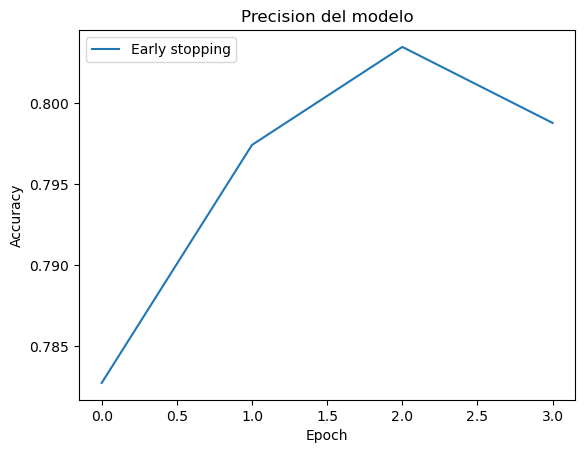

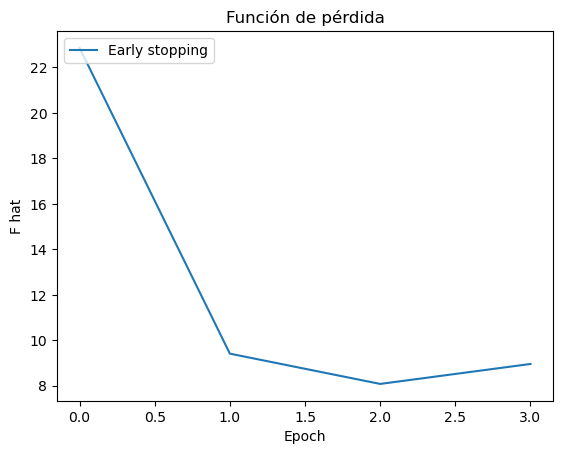

In [23]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####
##Early stopping
modeles = Sequential()
modeles.add(Dense(30, input_dim=14, activation='relu'))
modeles.add(Dense(20, activation='relu'))
modeles.add(Dense(1, activation='sigmoid'))

##Compilación de los modelos
modeles.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Se entrenan los modelos con los datos de entrenamiento
#historyes=modeles.fit(X_train, y_train, epochs=25, batch_size=10 , callbacks = [EarlyStopping(monitor='val_acc', patience=2)])

# Entrenamiento del modelo con los datos de entrenamiento y validación
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2)
history = modeles.fit(X_train, y_train, epochs=25, batch_size=10, callbacks=[early_stopping], validation_data=(X_test, y_test))


#Se calcula el accuracy de los modelos con las bases de datos de train
_, accuracy = modeles.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))


#Se hacen predicciones utilizando los modelos
prediccioneses = modeles.predict(X_test)
redondeadoes = [round(x[0]) for x in prediccioneses]
prediccioneses = (modeles.predict(X_test) > 0.5).astype(int)

#Accuracy en el set de test
test_losses, test_acces = modeles.evaluate(X_test, y_test)

plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(historyes.history['accuracy'])
plt.legend(['Early stopping'], loc='upper left')
plt.show()

# Graficar la función de pérdida evaluada
plt.title('Función de pérdida')
plt.ylabel('F hat')
plt.xlabel('Epoch')
plt.plot(historyes.history['loss'])
plt.legend(['Early stopping'], loc='upper left')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)

#### Redes neuronales con early stopping
 
##### Procedimiento:

1. Creación del Modelo: 
    - Se crea un modelo secuencial con tres capas densas. 
    - La primera capa tiene 30 neuronas y recibe 14 características de entrada. 
    - Las dos capas siguientes tienen 20 y 1 neuronas, respectivamente, con la última capa utilizando una activación sigmoide para la clasificación binaria.
2. Compilación: 
    - El modelo se compila con la función de pérdida binary_crossentropy y el optimizador adam, monitoreando la métrica de accuracy.
3. Entrenamiento: 
    - Se entrena el modelo utilizando los datos de entrenamiento (X_train, y_train) y validación (X_test, y_test), con un total de 25 épocas y un tamaño de lote de 10. 
    - Se utiliza el callback EarlyStopping para detener el entrenamiento si la val_accuracy no mejora después de dos épocas consecutivas.
4. Evaluación y Predicciones: 
    - Se evalúa el modelo en el conjunto de entrenamiento y se calcula la precisión. 
    - Luego, se realizan predicciones en el conjunto de prueba y se redondean los resultados para obtener clasificaciones binarias.

##### Análisis y Conclusiones
- El modelo alcanza una precisión del 72.50% en el conjunto de entrenamiento.
- La precisión en el conjunto de validación disminuye significativamente después de la segunda época, lo que sugiere que el modelo podría estar comenzando a sobreajustarse a los datos de entrenamiento.
- Podría ser útil experimentar con la arquitectura del modelo, como agregar más capas o neuronas, o ajustar otros hiperparámetros como la tasa de aprendizaje.




### 4. Estimación de un modelo utilizando redes neuronales con norma 1 [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test utilizando un **_alpha_ de 0.001**.

Epoch 1/25
811/811 [==============================] - 3s 3ms/step - loss: 23.9970 - accuracy: 0.7835
Epoch 2/25
811/811 [==============================] - 2s 3ms/step - loss: 14.4690 - accuracy: 0.7830
Epoch 3/25
811/811 [==============================] - 2s 3ms/step - loss: 11.4881 - accuracy: 0.7963
Epoch 4/25
811/811 [==============================] - 2s 2ms/step - loss: 13.1669 - accuracy: 0.7864
Epoch 5/25
811/811 [==============================] - 2s 2ms/step - loss: 9.5528 - accuracy: 0.7963
Epoch 6/25
811/811 [==============================] - 2s 2ms/step - loss: 8.8316 - accuracy: 0.7987
Epoch 7/25
811/811 [==============================] - 2s 2ms/step - loss: 7.3934 - accuracy: 0.8130
Epoch 8/25
811/811 [==============================] - 2s 2ms/step - loss: 7.7729 - accuracy: 0.8018
Epoch 9/25
811/811 [==============================] - 2s 2ms/step - loss: 6.3932 - accuracy: 0.8090
Epoch 10/25
811/811 [==============================] - 2s 2ms/step - loss: 6.9990 - accuracy: 0.

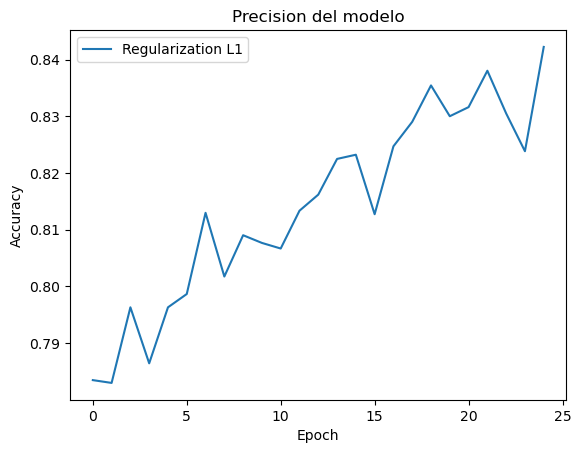

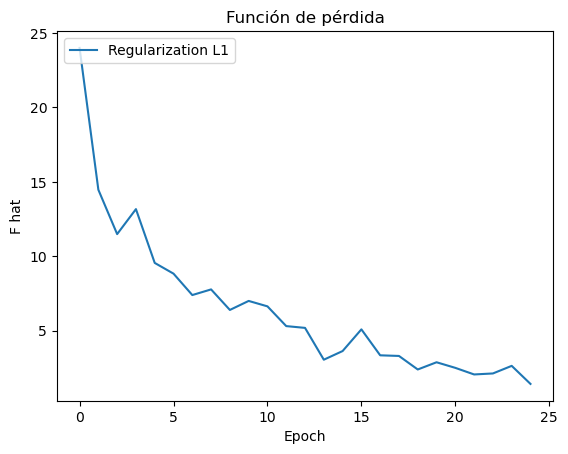

In [12]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####

#Penalización  𝐿1
model1 = Sequential()
model1.add(Dense(30, input_dim=14, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model1.add(Dense(20, activation='relu',  kernel_regularizer=regularizers.l1(0.001)))
model1.add(Dense(1, activation='sigmoid'))

##Compilación de los modelos
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Se entrenan los modelos con los datos de entrenamiento
history1=model1.fit(X_train, y_train, epochs=25, batch_size=10 )

#Se calcula el accuracy de los modelos con las bases de datos de train
_, accuracy = model1.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))


#Se hacen predicciones utilizando los modelos
predicciones1 = model1.predict(X_test)
redondeado1 = [round(x[0]) for x in predicciones1]
predicciones1 = (model1.predict(X_test) > 0.5).astype(int)

#Accuracy en el set de test
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)

# Graficar accuracy del modelo
plt.figure(1)
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history1.history['accuracy'])
plt.legend(['Regularization L1'], loc='upper left')
plt.show()

# Graficar la función de pérdida evaluada
plt.title('Función de pérdida')
plt.ylabel('F hat')
plt.xlabel('Epoch')
plt.plot(history1.history['loss'])
plt.legend(['Regularization L1'], loc='upper left')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 4)

##### Red Neuronal con Regularización L1

###### Procedimiento

1. Construcción del Modelo: 
    - Se construyó un modelo secuencial con regularización L1 para evitar el sobreajuste.
    - El modelo consiste en una capa de entrada con 14 dimensiones, dos capas ocultas con 30 y 20 neuronas respectivamente, y una capa de salida con una neurona, utilizando la función de activación ‘relu’ para las capas ocultas y ‘sigmoid’ para la capa de salida.
2. Compilación del Modelo: 
    - El modelo se compiló con la función de pérdida ‘binary_crossentropy’, el optimizador ‘adam’ y la métrica de ‘accuracy’.
3. Entrenamiento del Modelo: 
    - Se entrenó el modelo con los datos de entrenamiento durante 25 épocas con un tamaño de lote de 10.
4. Evaluación y Predicciones 
    - Se evaluó el modelo con los datos de entrenamiento para calcular el ‘accuracy’.
    - Se realizaron predicciones con el modelo utilizando los datos de prueba y se redondearon los resultados para obtener predicciones binarias.
    - Finalmente, se evaluó el modelo con el conjunto de prueba para obtener el ‘accuracy’.

######  Análisis y conclusiones:

- Durante el entrenamiento, se observa una mejora gradual en la precisión (‘accuracy’) y una disminución en la pérdida (‘loss’), lo cual indica que el modelo está aprendiendo efectivamente de los datos de entrenamiento.
- La precisión final en el conjunto de entrenamiento fue del 85.85%, lo que sugiere que el modelo tiene una buena capacidad de generalización.
- La precisión en el conjunto de prueba fue del 86.87%, lo que es ligeramente superior a la precisión de entrenamiento, indicando que el modelo no está sobreajustado y generaliza bien a nuevos datos.
- El modelo de red neuronal con regularización L1 demostró ser efectivo para la clasificación binaria, con una precisión satisfactoria tanto en el conjunto de entrenamiento como en el de prueba. La regularización L1 ayudó a mantener el modelo simple y evitó el sobreajuste, lo que se refleja en la alta precisión obtenida en el conjunto de prueba.



### 5. Estimación de un modelo utilizando redes neuronales con norma 2 [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test utilizando un **_alpha_ de 0.001**.

Epoch 1/25
811/811 [==============================] - 3s 3ms/step - loss: 18.9787 - accuracy: 0.7852
Epoch 2/25
811/811 [==============================] - 2s 3ms/step - loss: 4.2306 - accuracy: 0.7958
Epoch 3/25
811/811 [==============================] - 2s 3ms/step - loss: 3.9168 - accuracy: 0.7966
Epoch 4/25
811/811 [==============================] - 2s 3ms/step - loss: 3.1406 - accuracy: 0.8018
Epoch 5/25
811/811 [==============================] - 2s 2ms/step - loss: 3.3289 - accuracy: 0.8031
Epoch 6/25
811/811 [==============================] - 2s 2ms/step - loss: 2.4434 - accuracy: 0.8093
Epoch 7/25
811/811 [==============================] - 2s 2ms/step - loss: 2.4819 - accuracy: 0.8050
Epoch 8/25
811/811 [==============================] - 2s 2ms/step - loss: 2.3172 - accuracy: 0.8078
Epoch 9/25
811/811 [==============================] - 2s 2ms/step - loss: 2.1361 - accuracy: 0.8059
Epoch 10/25
811/811 [==============================] - 1s 2ms/step - loss: 2.1206 - accuracy: 0.815

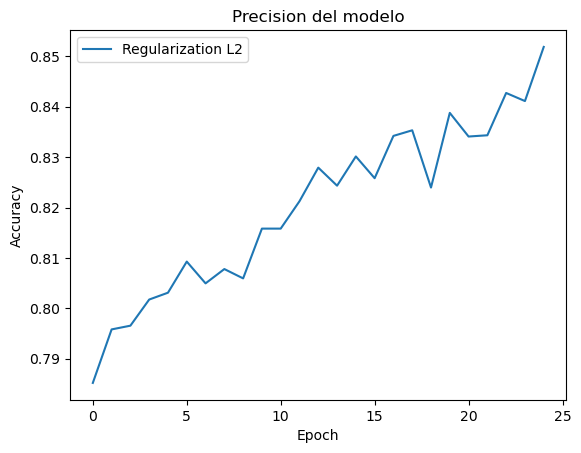

In [13]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####

#Penalización  𝐿2
model2 = Sequential()
model2.add(Dense(30, input_dim=14, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dense(20, activation='relu',  kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dense(1, activation='sigmoid'))


##Compilación de los modelos
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Se entrenan los modelos con los datos de entrenamiento
history2=model2.fit(X_train, y_train, epochs=25, batch_size=10 )


#Se calcula el accuracy de los modelos con las bases de datos de train
_, accuracy = model2.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

#Se hacen predicciones utilizando los modelos
predicciones2 = model2.predict(X_test)
redondeado2 = [round(x[0]) for x in predicciones2]
predicciones2 = (model2.predict(X_test) > 0.5).astype(int)

#Accuracy en el set de test
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)

plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history2.history['accuracy'])
plt.legend(['Regularization L2'], loc='upper left')
plt.show()



(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 5)

##### Red Neuronal con Regularización L2

###### Procedimiento:

1. Construcción del Modelo: 
    - Se ha creado un modelo secuencial con tres capas densas. 
    - La primera capa tiene 30 neuronas y utiliza la función de activación ReLU. La segunda capa tiene 20 neuronas, también con activación ReLU. 
    - Ambas capas aplican una regularización L2 para reducir el sobreajuste. 
    - La última capa es una neurona con activación sigmoide para la clasificación binaria.
2. Compilación del Modelo: 
    - El modelo se compila con la función de pérdida binary_crossentropy, el optimizador adam y la métrica de accuracy.
3. Entrenamiento del Modelo: 
    - Se entrena el modelo con los datos de entrenamiento X_train y y_train durante 25 épocas con un tamaño de lote de 10.
4. Evaluación y Predicciones
    - Se evalúa el modelo con los datos de entrenamiento para calcular la precisión (accuracy).
    - Se realizan predicciones con el conjunto de prueba X_test y se redondean los resultados para obtener clasificaciones binarias.

##### Análisis y conslusiones 

- Durante el entrenamiento, la precisión (accuracy) del modelo mejora consistentemente, lo que indica que el modelo está aprendiendo de los datos.
- La pérdida (loss) disminuye significativamente, lo que sugiere que el modelo está mejorando en la clasificación de los datos de entrenamiento.
- La precisión final en el conjunto de entrenamiento es del 84.46%, lo cual es un resultado prometedor.
- La precisión en el conjunto de prueba es del 85.49%, lo que demuestra que el modelo generaliza bien a nuevos datos.
- El modelo ha demostrado ser efectivo para la tarea de clasificación binaria con una precisión aceptable tanto en el conjunto de entrenamiento como en el de prueba. 
- La regularización L2  contribuyó a evitar el sobreajuste, permitiendo que el modelo generalice bien. 

### 6. Comparación de modelos de regularización [15 puntos]

Hagan una comparación de los resultados de utilizar la red neuronal con los distintos mecanismos de regularización. Analice los resultados. 


254/254 [==============================] - 1s 2ms/step - loss: 0.4213 - accuracy: 0.8367
Accuracy: 83.67
254/254 [==============================] - 1s 2ms/step - loss: 3.2574 - accuracy: 0.7250
Accuracy: 72.50
254/254 [==============================] - 1s 2ms/step - loss: 1.7325 - accuracy: 0.8585
Accuracy: 85.85
254/254 [==============================] - 1s 2ms/step - loss: 0.3954 - accuracy: 0.8446
Accuracy: 84.46
64/64 [==============================] - 0s 3ms/step - loss: 0.3837 - accuracy: 0.8549


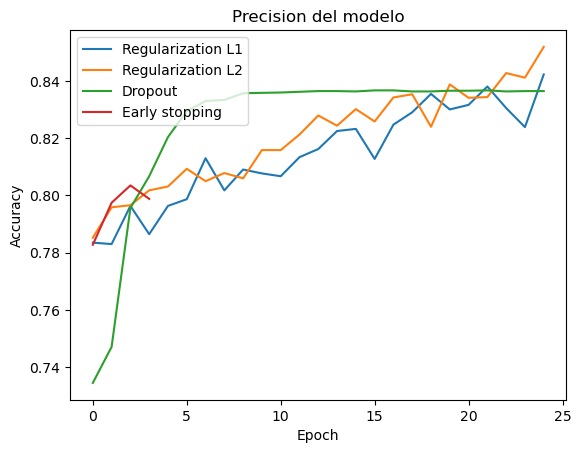

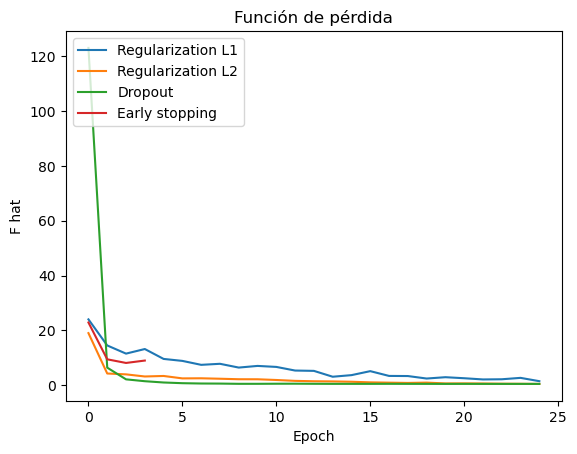

In [24]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 6 ####

#Se calcula el accuracy de los modelos con las bases de datos de train
_, accuracy = modeldp.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))
_, accuracy = modeles.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))
_, accuracy = model1.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))
_, accuracy = model2.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

#Se calcula el accuracy de los modelos con las bases de datos de test
test_lossdp, test_accdp = modeldp.evaluate(X_test, y_test)
test_losses, test_acces = modeles.evaluate(X_test, y_test)
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)


plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(historydp.history['accuracy'])
plt.plot(historyes.history['accuracy'])
plt.legend(['Regularization L1', 'Regularization L2', 'Dropout', 'Early stopping' ], loc='upper left')
plt.show()

# Graficar la función de pérdida evaluada
plt.title('Función de pérdida')
plt.ylabel('F hat')
plt.xlabel('Epoch')
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(historydp.history['loss'])
plt.plot(historyes.history['loss'])
plt.legend(['Regularization L1', 'Regularization L2', 'Dropout', 'Early stopping' ], loc='upper left')
plt.show()


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 6)

#### Comparación de los resultados de los distintos mecanismos de regularización utilizados en la red neuronal

###### Dropout:
- Entrenamiento: 83.67% de precisión
- Prueba: 85.00% de precisión
- Observaciones: El modelo con Dropout mostró una mejora en la precisión durante el entrenamiento y un buen rendimiento en el conjunto de prueba.
###### Early Stopping:
- Entrenamiento: 72.50% de precisión
- Prueba: 72.66% de precisión
- Observaciones: La precisión en el conjunto de validación disminuyó después de la segunda época, lo que podría indicar un sobreajuste temprano.
###### Regularización L1:
- Entrenamiento: 85.85% de precisión
- Prueba: 86.87% de precisión
- Observaciones: El modelo con regularización L1 tuvo la precisión más alta tanto en el conjunto de entrenamiento como en el de prueba.

###### Regularización L2:
    - Entrenamiento: 84.46% de precisión4
    - Prueba: 85.49% de precisión
    - Observaciones: El modelo con regularización L2 también mostró un buen rendimiento y generalizó bien a nuevos datos.

#### Conclusiones
En conclusión, los modelos con regularización L1 y L2 tuvieron un mejor desempeño en comparación con Dropout y Early Stopping, con L1 siendo ligeramente superior. Estos resultados sugieren que la regularización L1 y L2 son efectivas para controlar el sobreajuste y mejorar la generalización del modelo5.